# Exercício Prático 02

Este notebook apresenta um roteiro para execução da avaliação EP02. O objetivo desta atividade é construir funções em Python, usando a JGraphT Python Bindings que implementem as tarefas indicadas nas questões a seguir. Use a estrutura já disponível neste notebook.

**Orientações Gerais**:

* Implemente as funções ou testes solicitados sem realizar qualquer alteração em sua assinatura (nomes e parâmetros), visto que esta avaliação terá como parte de sua correção a execução de testes automáticos;

* Os grupos devem implementar as soluções exclusivamente através da representação e manipulação de grafos usando a JGraphT juntamente com construções gerais de Python quando indispensável;

* Apresente documentação (comentários no código) para descrever a solução apresentada. Evite documentar em excesso, apenas o mínimo necessário para facilitar a compreensão do código;

* Organize o código de forma consistente para facilitar sua legibilidade. Por exemplo, evite espaçamentos entre linhas ou identação inconsistentes; use nomes de funções/variáveis significativos.

*Atenção*: Os blocos de código neste roteiro, especialmente referentes a instalação e importação e definições auxiliares, devem ser executados na sequência em que são apresentados abaixo, antes de cada uso deste notebook, a fim de garantir que as definições necessárias em cada trecho foram devidamente importadas/criadas.

# Instalação da JGraphT e Importação de Pacotes e Arquivos deste Notebook

Python bindings pode ser instalado usando pip no escopo de qualquer interpretador python.
Abaixo, temos a instalação para este notebook e a importação de bibliotecas e arquivos que usaremos a seguir.

In [ ]:
# Instalando a JgraphT para uso neste notebook
!pip install jgrapht

# Importando a JgraphT
import jgrapht

# Importando funções para visualização gráfica
import jgrapht.drawing.draw_matplotlib as draw_matplotlib
import matplotlib.pyplot as plt

# Importanto funções para print de vértices e arestas
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/getutil.py
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/importutil.py
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/drawutil.py
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/rootedtreeutil.py
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/connectutil.py
from importutil import read_multiple_CSV
from getutil import get_vertice_labels, get_edge_labels, get_vertexid
from drawutil import draw_graph
from connectutil import edge_cut

# Download de arquivos de grafos usados neste notebook
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/datasets/london.stations.csv
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/datasets/london.connections.csv

# Funções e pacotes para teste
import unittest
# From: https://eli.thegreenplace.net/2011/08/02/python-unit-testing-parametrized-test-cases
class ParametrizedTestCase(unittest.TestCase):
    """ TestCase classes that want to be parametrized should
        inherit from this class.
    """
    def __init__(self, methodName='runTest', param=None):
        super(ParametrizedTestCase, self).__init__(methodName)
        self.param = param

    @staticmethod
    def parametrize(testcase_klass, param=None):
        """ Create a suite containing all tests taken from the given
            subclass, passing them the parameter 'param'.
        """
        testloader = unittest.TestLoader()
        testnames = testloader.getTestCaseNames(testcase_klass)
        suite = unittest.TestSuite()
        for name in testnames:
            suite.addTest(testcase_klass(name, param=param))
        return suite


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 5.2 MB/s 
--2022-12-08 00:38:17--  https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/getutil.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7413 (7.2K) [text/plain]
Saving to: ‘getutil.py’

getutil.py          100%[===================>]   7.24K  --.-KB/s    in 0s      

2022-12-08 00:38:17 (79.3 MB/s) - ‘getutil.py’ saved [7413/7413]

--2022-12-08 00:38:17--  https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/importutil.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.1

# Tema: Metropolitano (Continuação)

Neste exercício, daremos continuidade a implementação de funções para obter informações sobre serviços em metropolitanos. Consulte o notebook do EP01 para mais detalhes sobre o tema e também sobre os grafos que iremos usar para testes e ilustrações de conceitos (Metrô de Londres e Metrô hipotético). Estes grafos são criados nas células de código a seguir.

In [ ]:
# Criando instâncias do grafo e seus dicionários de atributos
lu = jgrapht.create_graph(directed=False,weighted=True,
                         allowing_multiple_edges=True)
v_lu = {}
e_lu = {}
# Importando sua definição
read_multiple_CSV(lu,v_lu,e_lu,
                  'london.stations.csv','station_id','name',
                  'london.connections.csv','station1','station2',weightid='time',
                  delimiter=',')
# Imprimindo os conjuntos de vértices e atributos
print(get_vertice_labels(lu,v_lu))
print(get_edge_labels(lu,v_lu,e_lu))
print(v_lu)
print(e_lu)
# Exportando grafo no formato gml (arquivo lu.gml será salvo nos arquivos deste notebook)
# Arquivo pode ser carregado na ferramenta yEd
# Sugestão: use o layout Orthogonal (Compact)
from jgrapht.io.exporters import generate_gml
gmlstring = generate_gml(lu,per_vertex_attrs_dict=v_lu,per_edge_attrs_dict=e_lu)
f = open('lu.gml',"w")
f.write(gmlstring)
f.close()

{'Osterley', 'Marylebone', 'Debden', 'Goodge Street', 'Gants Hill', 'Kew Gardens', 'Redbridge', 'Stonebridge Park', 'Canons Park', 'Devons Road', 'Finchley Road', 'Dagenham Heathway', 'Gloucester Road', 'Kennington', 'Knightsbridge', 'Surrey Quays', 'Chiswick Park', 'Wanstead', 'Pudding Mill Lane', 'Blackwall', 'Clapham South', 'Putney Bridge', 'White City', 'Wembley Central', 'Turnham Green', 'Beckton', 'Caledonian Road', 'Greenford', 'Island Gardens', 'Kentish Town', 'Gunnersbury', 'Lambeth North', 'Upminster Bridge', 'Bethnal Green', 'Clapham Common', 'Archway', 'Hornchurch', 'Euston', 'Cyprus', 'Hounslow East', 'Sudbury Hill', 'Hillingdon', "Queen's Park", 'Barking', 'Kilburn', 'East India', 'Maida Vale', 'Queensway', 'Westferry', 'West Ham', 'Cutty Sark', 'Mill Hill East', 'Canary Wharf', 'Moor Park', 'Kensington (Olympia)', 'Oval', 'Harrow and Wealdston', 'Embankment', 'South Quay', 'Harrow-on-the-Hill', 'Amersham', 'Rickmansworth', 'Bond Street', 'Stamford Brook', 'High Barnet',

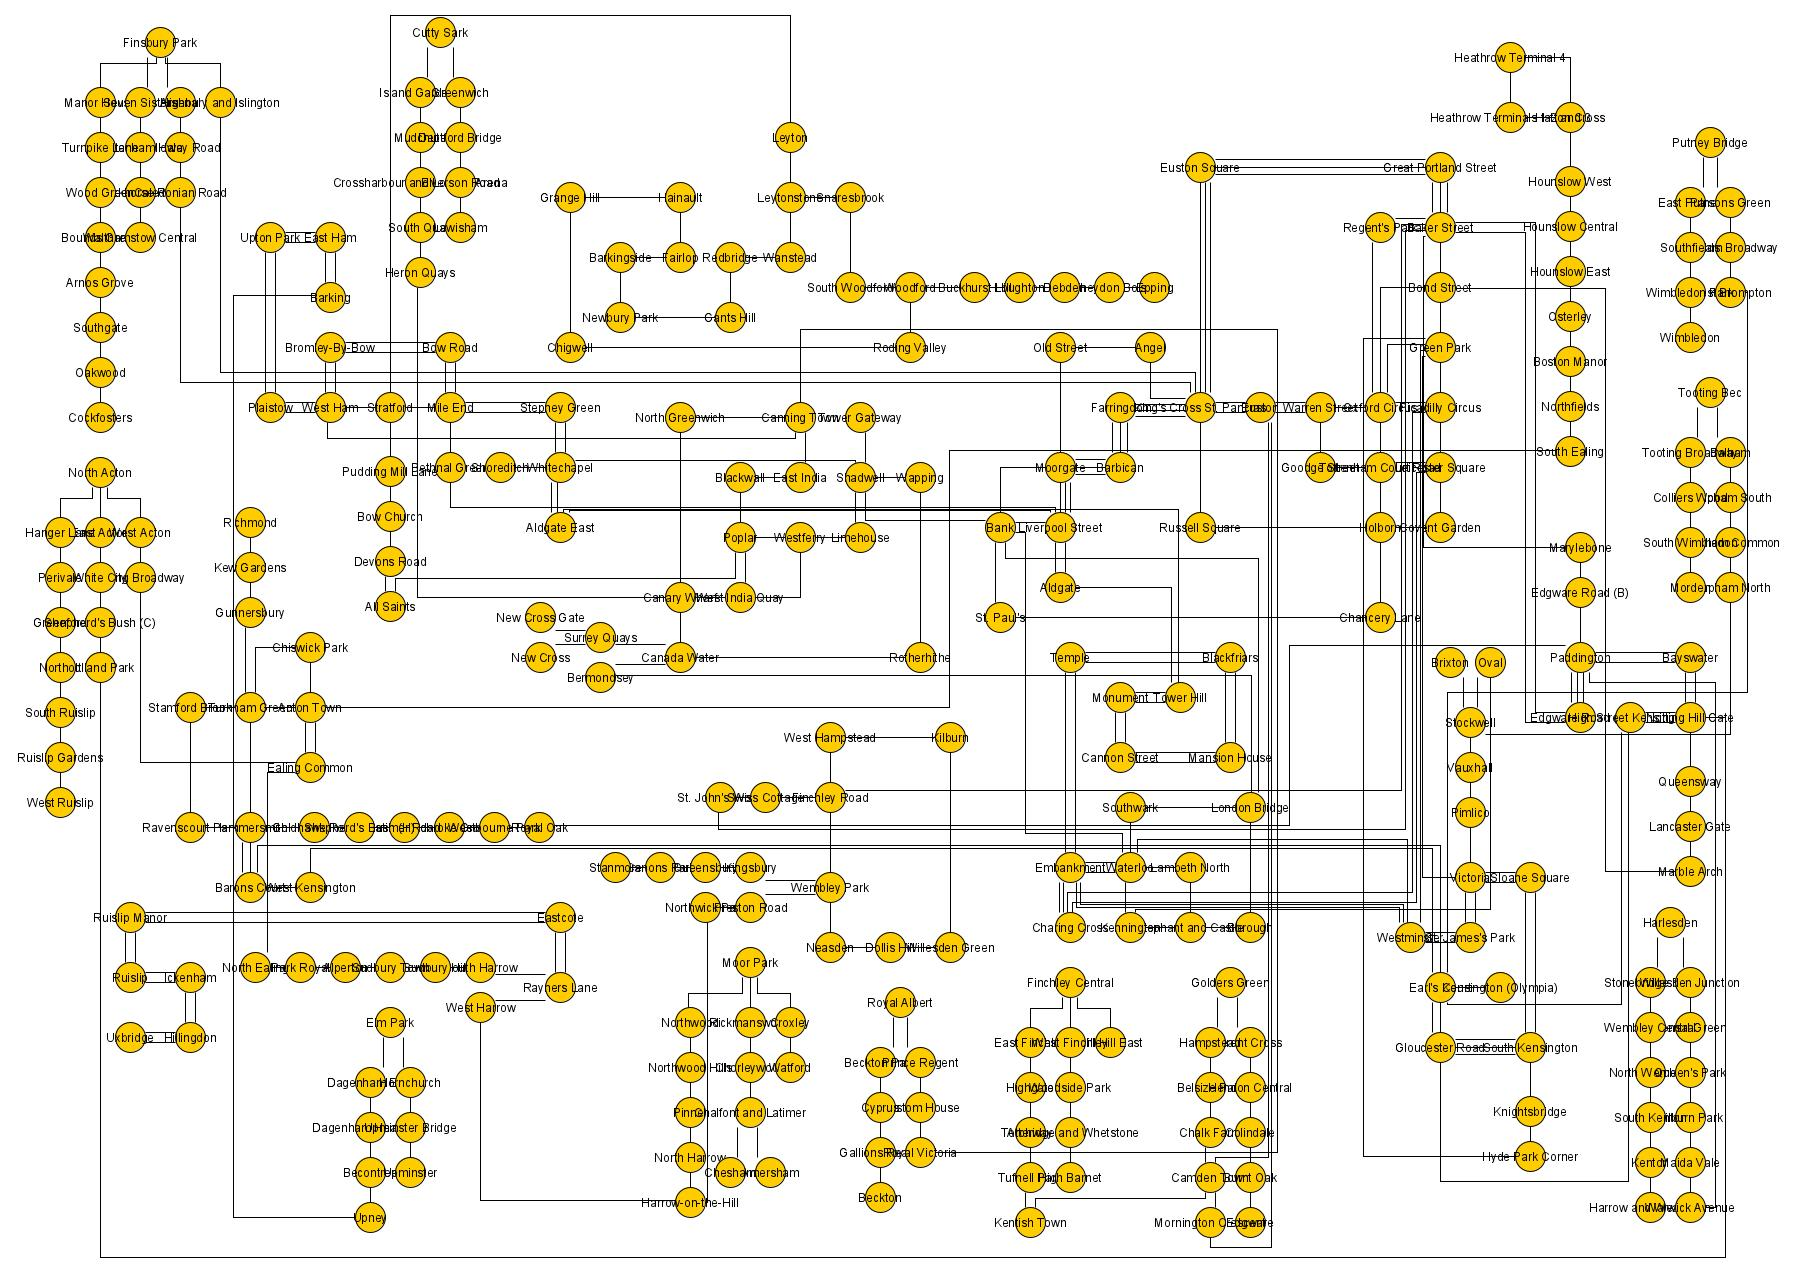

In [ ]:
#Testes para conferir se o grafo lu foi criado corretamente.
import unittest

class TestgraphCreation(unittest.TestCase):

    def test_properties(self):
      self.assertEqual(len(lu.vertices),302)
      self.assertEqual(len(lu.edges),406)
      self.assertTrue(jgrapht.properties.has_multipleedges(lu))
      self.assertTrue(jgrapht.properties.is_strongly_connected(lu))
      self.assertEqual(jgrapht.metrics.diameter(lu),108.0)
      self.assertTrue(any(lu.get_edge_weight(e) > 1.0 for e in lu.edges))

# call your test
suite = unittest.TestSuite()
suite.addTest(TestgraphCreation('test_properties'))
unittest.TextTestRunner(verbosity=2).run(suite)

test_properties (__main__.TestgraphCreation) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.381s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

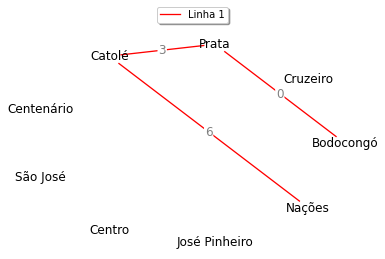

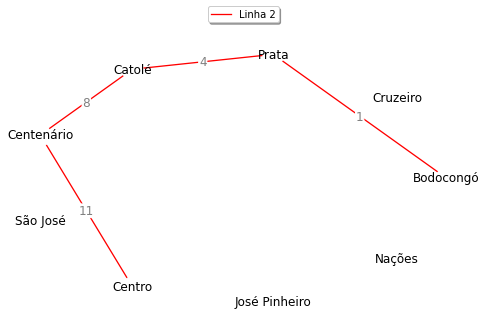

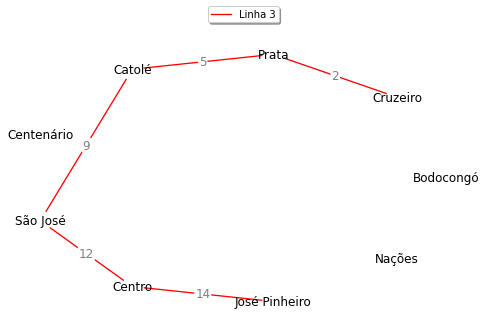

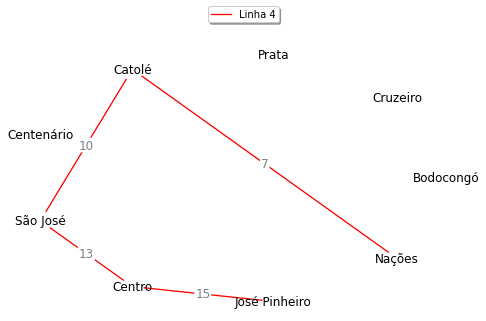

In [ ]:
#@title   { run: "auto", vertical-output: true }
g1 = jgrapht.create_graph(directed=False,weighted=True,
                         allowing_multiple_edges=True)
v_g1 = {}
e_g1 = {}
g1.add_vertices_from([x for x in range(9)])
v_g1={0:{'label':'Bodocongó'},1:{'label':'Cruzeiro'},2:{'label':'Prata'},
      3:{'label':'Catolé'},4:{'label':'Centenário'},5:{'label':'São José'},
      6:{'label':'Centro'},7:{'label':'José Pinheiro'},8:{'label':'Nações'}}
g1.add_edges_from([(0,2),(0,2),(1,2),(2,3),(2,3),(2,3),(3,8),(8,3),#0-7
                   (3,4),(3,5),(3,5),(4,6),(5,6),(5,6),(6,7),(6,7)]) #8-15
e_g1 = {0:{'line':'1'},1:{'line':'2'},2:{'line':'3'},3:{'line':'1'},
        4:{'line':'2'},5:{'line':'3'},6:{'line':'1'},7:{'line':'4'},
        8:{'line':'2'},9:{'line':'3'},10:{'line':'4'},11:{'line':'2'},
        12:{'line':'3'},13:{'line':'4'},14:{'line':'3'},15:{'line':'4'}}
for e in g1.edges:
  g1.set_edge_weight(e,abs(e-(g1.edge_source(e)+g1.edge_target(e))))
for l in ['1', '2', '3', '4']:
  from jgrapht.views import as_masked_subgraph
  edges_line = [e for e in g1.edges if e_g1[e]['line']==l]
  linha_view = as_masked_subgraph(g1,vertex_mask_cb = lambda v : False,
                                edge_mask_cb= lambda e : not e in edges_line)
  draw_graph(linha_view,layout="circular",v_attrs=v_g1,vlabel='label', edgeid_aslabel=True,
             vertex_color="white", edge_color="white",
             eset=[edges_line],
             esetlabel=[f"Linha {l}"],esetcolor=["red"])


# Questão 01 - Trechos com sobrecarga

O monitoramento de um metrô é feito continuamente para minimizar a sobrecarga do sistema e orientar passageiros a seguir por diferentes trajetos quando necessário. Em certas horas ou dias, alguns grupos de estações recebem um número maior de passageiros fazendo com que os trechos que passam por estas estações fiquem sobrecarregados e aumente o tempo de espera dos passageiros por um trem com vaga.
Escreva uma função, **trechoscomsobrecarga**, que recebe como entrada, um grafo *g* e seus dicionários de atributos, *v_g* e *e_g*, uma lista de estações *X* e retorne uma lista com informações sobre todos os trechos que levam de estações *s* que não pertencem a *X* para uma estação *x* de *X* e a linha correspondente.

*Exemplo*: Considere o grafo **g1** e a lista de estações ["Centro", São José"]. A função deve retornar a seguinte lista de trechos (não necessariamente nesta ordem):

[('Catolé', 'São José', '3'), ('Catolé', 'São José', '4'), ('Centenário', 'Centro', '2'), ('José Pinheiro', 'Centro', '3'), ('José Pinheiro', 'Centro', '4')]

**Dica**: use o conceito de corte de arestas.



In [ ]:
def trechoscomsobrecarga (g,v_g,e_g,stations):

  if g is None or v_g is None or e_g is None:
    return None

  if len(stations) < 1 or len(g.vertices) == 1 :
    return []

  if v_g == {} or e_g == {}:
    return None

  for i in stations:
    if get_vertexid(i, v_g) is None:
      return None

  for i in g.vertices:
    if v_g.get(i) is None:
      return None

  for i in g.edges:
    if e_g.get(i) is None:
      return None

  stationsArray = []
  for i in stations:
    stationsArray.append(get_vertexid(i, v_g))

  array = []
  for v in stations:
    for e in g.edges_of(get_vertexid(v,v_g)):
      vertice = g.opposite(e, (get_vertexid(v,v_g)))
      if vertice not in stationsArray and vertice not in array:
        array.append((v_g[vertice]["label"], v, e_g[e]["line"]))

  return array

# Testes Manuais
# Grafo g1
# Saída esperada: [('Catolé', 'São José', '3'), ('Catolé', 'São José', '4'), ('Centenário', 'Centro', '2'), ('José Pinheiro', 'Centro', '3'), ('José Pinheiro', 'Centro', '4')]
print(trechoscomsobrecarga(g1,v_g1,e_g1,['Centro', 'São José']))
# Grafo lu
# Saída esperada: [('Liverpool Street', 'Aldgate', '3'), ('Monument', 'Tower Hill', '3'), ('Aldgate East', 'Tower Hill', '4'), ('Monument', 'Tower Hill', '4'), ('Liverpool Street', 'Aldgate', '8')]
print(trechoscomsobrecarga(lu,v_lu,e_lu,["Aldgate","Tower Hill"]))


[('Centenário', 'Centro', '2'), ('José Pinheiro', 'Centro', '3'), ('José Pinheiro', 'Centro', '4'), ('Catolé', 'São José', '3'), ('Catolé', 'São José', '4')]
[('Liverpool Street', 'Aldgate', '3'), ('Liverpool Street', 'Aldgate', '8'), ('Monument', 'Tower Hill', '3'), ('Aldgate East', 'Tower Hill', '4'), ('Monument', 'Tower Hill', '4')]


## Testes Automáticos

In [ ]:
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/test/java/epgs/Test_trechoscomsobrecarga.py
from Test_trechoscomsobrecarga import Test_trechoscomsobrecarga_base, Test_trechoscomsobrecarga_edge, params_g1, params_lu

paramsf_g1 = [[trechoscomsobrecarga,g1,v_g1,e_g1]+p for p in params_g1]
paramsf_lu = [[trechoscomsobrecarga,lu,v_lu,e_lu]+p for p in params_lu]
tc_g1 = [ParametrizedTestCase.parametrize(Test_trechoscomsobrecarga_base, param=paramsf_g1[i]) for i in range(len(paramsf_g1))]
tc_lu = [ParametrizedTestCase.parametrize(Test_trechoscomsobrecarga_base, param=paramsf_lu[i]) for i in range(len(paramsf_lu))]
tc_edge = [ParametrizedTestCase.parametrize(Test_trechoscomsobrecarga_edge, param=[trechoscomsobrecarga,g1,v_g1,e_g1])]
suite1g1 = unittest.TestSuite()
for tc in tc_g1:
  suite1g1.addTest(tc)
unittest.TextTestRunner(verbosity=2).run(suite1g1)
suite1lu = unittest.TestSuite()
for tc in tc_lu:
  suite1lu.addTest(tc)
unittest.TextTestRunner(verbosity=2).run(suite1lu)
suite1edge = unittest.TestSuite()
for tc in tc_edge:
  suite1edge.addTest(tc)
unittest.TextTestRunner(verbosity=2).run(suite1edge)

--2022-12-08 00:46:10--  https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/test/java/epgs/Test_trechoscomsobrecarga.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4797 (4.7K) [text/plain]
Saving to: ‘Test_trechoscomsobrecarga.py.3’

Test_trechoscomsobr 100%[===================>]   4.68K  --.-KB/s    in 0s      

2022-12-08 00:46:10 (47.3 MB/s) - ‘Test_trechoscomsobrecarga.py.3’ saved [4797/4797]



test_base (Test_trechoscomsobrecarga.Test_trechoscomsobrecarga_base) ... ok
test_base (Test_trechoscomsobrecarga.Test_trechoscomsobrecarga_base) ... ok
test_base (Test_trechoscomsobrecarga.Test_trechoscomsobrecarga_base) ... ok
test_base (Test_trechoscomsobrecarga.Test_trechoscomsobrecarga_base) ... ok
test_base (Test_trechoscomsobrecarga.Test_trechoscomsobrecarga_base) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.021s

OK
test_base (Test_trechoscomsobrecarga.Test_trechoscomsobrecarga_base) ... ok
test_base (Test_trechoscomsobrecarga.Test_trechoscomsobrecarga_base) ... ok
test_base (Test_trechoscomsobrecarga.Test_trechoscomsobrecarga_base) ... ok
test_base (Test_trechoscomsobrecarga.Test_trechoscomsobrecarga_base) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.012s

OK
test_None (Test_trechoscomsobrecarga.Test_trechoscomsobrecarga_edge) ... ok
test_edict_invalido (Test_trechoscomsobrecar

<unittest.runner.TextTestResult run=7 errors=0 failures=0>


# Questão 02 - Atrações mais próximas

Sistemas de metrô são muito utilizados por turistas para visitar as principais atrações da cidade, especialmente o metrô de Londres. Usualmente existe uma estação próxima a cada uma das principais atrações. Os dicionários abaixo ilustram esta relação para o metrô de Londres e o metrô hipotético, respectivamente, onde o primeiro campo refere-se a uma atração e o segundo a estação mais próxima.

In [ ]:
atracoes_lu = {
    'Sherlock Holmes Museum' : 'Baker Street',
    'Roman temple-style' : 'Bank',
    'Barbican Centre' : 'Barbican',
    'High Street Shopping' : 'Bond Street',
    'Markets' : 'Borough',
    'Trafalgar Square' : 'Charing Cross',
    'London Transport Museum' : 'Covent Garden',
    "Cleopatra's Needle Obelisk" : 'Embankment',
    "Mr Fogg's House of Botanicals" : 'Goodge Street',
    'Buckingham Palace' : 'Green Park',
    'Kensington Palace' : 'High Street Kensington',
    'Christmas market' : 'Hyde Park Corner',
    'Harry Potter platform 9 3/4' : "King's Cross St. Pancras",
    'Harrods' : 'Knightsbridge',
    'Film Premieres square' : 'Leicester Square',
    'Old Spitalfields Market' : 'Liverpool Street',
    'Tower Bridge' : 'London Bridge',
    'Marble Arch' : 'Marble Arch',
    'The Wallace Collection' : 'Marylebone',
    'Notting Hill film setting' : 'Notting Hill Gate',
    'Great Portland Street': 'Oxford Circus',
    'Shaftesbury Memorial Fountain' : 'Picadilly Circus',
    'Shoreditch' : 'Shoreditch',
    'Saatchi Gallery' : 'Sloane Square',
    'V&A (Victoria and Albert) Museum' : 'South Kensington',
    "St Paul’s Cathedral" : "St. Paul's",
    "Tower of London" : 'Tower Hill',
    'Victoria Palace Theatre' : 'Victoria',
    'Palace of Westminster' : 'Westminster',
    'The London Eye' : 'Waterloo',
    'Royal Academy of Arts' : 'Green Park',
    'Chinatown' : 'Leicester Square',
    'The Shard' : 'London Bridge',
    'SoHo' : 'Picadilly Circus',
    'Tower Bridge' : 'Tower Hill',
    'Big Ben' : 'Westminster',
    'Royal Festival Hall' : 'Waterloo'
  }

atracoes_g1 = {
      'Parque do Povo' : 'São José',
      'Açude Velho' : 'São José',
      'Sítio São João' : 'Cruzeiro',
      'Museu de Arte Popular' : 'Catolé',
      'Parque da Criança' : 'Catolé',
      'Trem do Forró' : 'Catolé',
      'Treze' : 'Prata',
      'Campinense' : 'Prata',
      'Catedral' : 'Centro',
      'Teatro Municipal' : 'Centro',
      'Comércio de Couros e Artefatos' : 'José Pinheiro',
      'UFCG' : 'Bodocongó'
  }

Vamos considerar agora um turista que gosta de decidir para onde ir a medida que vai visitando pontos turísticos. Estando em uma certa estação, ele gostaria de saber quais são as atrações mais próximas. Considere que a distância será medida em termos do número de trechos entre estações que um trajeto de trem deverá cruzar da estação corrente até a estação desejada.

Construa uma função, *atracoesmaisproximas*, que recebe o grafo e seu dicionário de vértices, a estação atual e um limite de distância e retorna uma relação de atrações dentro deste limite, indicando a estação em que deve desembarcar.

**Dica**: Use o algoritmo **bfs** (Busca em Largura). Veja função bfs do pacote [shortestpaths](https://python-jgrapht.readthedocs.io/en/jgrapht-1.5.0.3/api/algorithms/shortestpaths.html#shortest-paths) da JgraphT. Ou utilize a implementação apresentada no notebook da Aula 17.

Como exemplo, considere que o turista está na estação "Bank" do metrô de Londres e que quer se deslocar em no máximo 2 estações. Para tal, podemos construir uma árvore de busca em largura, tendo "Bank" como raiz. A função bfs retorna a árvore e a função nível que indica a distancia de qualquer vértice para a raiz. Como resultado, temos a árvore bfs ilustrada na figura abaixo, que mostra apenas os vértices com nível menor ou igual a 2. Com distância 1, temos as estações com vértice em rosa. Com distância 2, temos as estações com vértice em laranja. Consultando o dicionário *lu_atractions*, podemos descobrir que atrações estão associadas a estas estações e então retornar os pares (atração, estação).


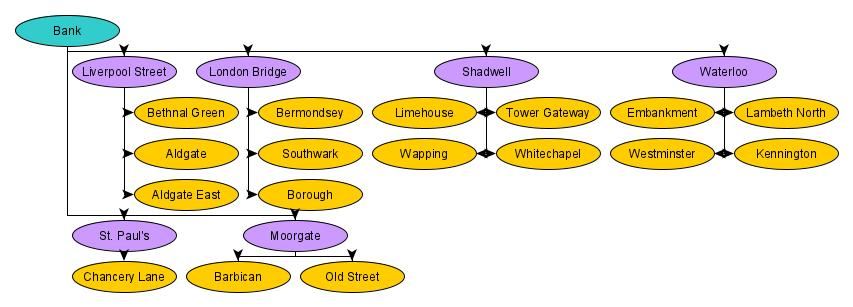

In [ ]:
def atracoesmaisproximas (g,v_g,attractions,currentStation,maxdist):
  # escreva aqui o seu código
  return []

# Testes Manuais
# Grafo g1
# Saída esperada: [('UFCG', 'Bodocongó'), ('Treze', 'Prata'), ('Campinense', 'Prata')]
print(atracoesmaisproximas(g1,v_g1,atracoes_g1,'Bodocongó',1))
# Grafo lu
# Saída Esperada: [('Kensington Palace', 'High Street Kensington')]
print(atracoesmaisproximas(lu,v_lu,atracoes_lu,'Gunnersbury',5))

[]
[]


### Testes Automáticos

In [ ]:
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/test/java/epgs/Test_atracoesmaisproximas.py
from Test_atracoesmaisproximas import Test_atracoesmaisproximas_base, Test_atracoesmaisproximas_edge, params_g1, params_lu

paramsf_g1 = [[atracoesmaisproximas,g1,v_g1,atracoes_g1]+p for p in params_g1]
paramsf_lu = [[atracoesmaisproximas,lu,v_lu,atracoes_lu]+p for p in params_lu]
tc_g1 = [ParametrizedTestCase.parametrize(Test_atracoesmaisproximas_base, param=paramsf_g1[i]) for i in range(len(paramsf_g1))]
tc_lu = [ParametrizedTestCase.parametrize(Test_atracoesmaisproximas_base, param=paramsf_lu[i]) for i in range(len(paramsf_lu))]
tc_edge = [ParametrizedTestCase.parametrize(Test_atracoesmaisproximas_edge, param=[atracoesmaisproximas,g1,v_g1])]
suite2g1 = unittest.TestSuite()
for tc in tc_g1:
  suite2g1.addTest(tc)
unittest.TextTestRunner(verbosity=2).run(suite2g1)
suite2lu = unittest.TestSuite()
for tc in tc_lu:
  suite2lu.addTest(tc)
unittest.TextTestRunner(verbosity=2).run(suite2lu)
suite2edge = unittest.TestSuite()
for tc in tc_edge:
  suite2edge.addTest(tc)
unittest.TextTestRunner(verbosity=2).run(suite2edge)

--2022-11-23 13:44:13--  https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/test/java/epgs/Test_atracoesmaisproximas.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3123 (3.0K) [text/plain]
Saving to: ‘Test_atracoesmaisproximas.py’

Test_atracoesmaispr 100%[===================>]   3.05K  --.-KB/s    in 0s      

2022-11-23 13:44:13 (41.0 MB/s) - ‘Test_atracoesmaisproximas.py’ saved [3123/3123]



test_base (Test_atracoesmaisproximas.Test_atracoesmaisproximas_base) ... FAIL

FAIL: test_base (Test_atracoesmaisproximas.Test_atracoesmaisproximas_base)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/content/Test_atracoesmaisproximas.py", line 58, in test_base
    self.assertCountEqual(f(g,v_g,estacoes,atual,maxdist),saida_esperada,m)
AssertionError: Element counts were not equal:
First has 0, Second has 1:  ('UFCG', 'Bodocongó')
First has 0, Second has 1:  ('Treze', 'Prata')
First has 0, Second has 1:  ('Campinense', 'Prata') : #01

----------------------------------------------------------------------
Ran 1 test in 0.004s

FAILED (failures=1)
test_base (Test_atracoesmaisproximas.Test_atracoesmaisproximas_base) ... FAIL

FAIL: test_base (Test_atracoesmaisproximas.Test_atracoesmaisproximas_base)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/content/T

<unittest.runner.TextTestResult run=6 errors=0 failures=6>

# Questão 03 - Visita a todos os trechos entre estações

Para que o metrô funcione sem interrupção de serviços, é necessário que seja realizada uma monitoração constante das conexões físicas entre as estações. Para minimizar o esforço de deslocamento em visitas técnicas aos trechos, é importante planejar antecipadamente roteiros que cubram o maior número possível de estações e trechos em um curto espaço de tempo.  

Construa uma função, *melhorcircuito*, que encontra um circuito de menor custo com mesma origem e destino que passa por todas as conexões físicas entre um grupo de estações. A função recebe como entrada uma lista de estações que  devem ser visitadas no circuito. Caso não seja possível encontrar o circuito, por falta de adjacência entre as estações, a função deve retornar um circuito vazio.

Por exemplo, para o grafo **g1**, é possível encontrar um circuito entre as estações "São José, Centro, José Pinheiro":

['José Pinheiro', 'Centro', 'São José', 'Centro', 'José Pinheiro']

Mas, para as estações "São José, Cruzeiro, Nações", não é possível encontrar um circuito. Note que "Nações" não é adjacente a nenhuma das outras estações.

**Dica**: crie uma versão do grafo original como um grafo simples. O grafo original é um multigrafo, visto que duas estações podem estar conectadas por mais de uma linha, mas todas estas linhas usam apenas uma única conexão física (trilho). Use o algortimo de [Edmonds-Johnson](https://python-jgrapht.readthedocs.io/en/jgrapht-1.5.0.3/api/algorithms/cycles.html#jgrapht.algorithms.cycles.chinese_postman) que resolve o chinese postman problem (CPP), aplicando na versão simples do grafo que inclui apenas as estações indicadas.


In [ ]:
def melhorcircuito(g,v_g,stations):
  # escreva seu código aqui
  return []

################
# Testes Manuais
# Grafo g1
print(f"Circuito: {melhorcircuito(g1,v_g1,['Bodocongó', 'Cruzeiro', 'Prata', 'Catolé', 'Centenário', 'Nações'])}")
#Saída Esperada: ['Nações', 'Catolé', 'Centenário', 'Catolé', 'Prata', 'Bodocongó', 'Prata', 'Cruzeiro', 'Prata', 'Catolé', 'Nações']
print(f"Circuito: {melhorcircuito(g1,v_g1,['São José', 'Centro', 'José Pinheiro'])}")
#Saída Esperada: ['José Pinheiro', 'Centro', 'São José', 'Centro', 'José Pinheiro']
print(f"Circuito: {melhorcircuito(g1,v_g1,['São José', 'Cruzeiro', 'Nações'])}")
#Saída Esperada: []
# Grafo lu
print(f"Circuito: {melhorcircuito(lu,v_lu,['Aldgate East', 'Shadwell', 'Shoreditch', 'Tower Gateway', 'Wapping', 'Whitechapel'])}")
#Saída Esperada: ['Whitechapel', 'Shoreditch', 'Whitechapel', 'Shadwell', 'Wapping', 'Shadwell', 'Tower Gateway', 'Shadwell', 'Whitechapel', 'Aldgate East', 'Whitechapel']
print(f"Circuito: {melhorcircuito(lu,v_lu,['Bond Street', 'Green Park', 'Hyde Park Corner', 'Lancaster Gate', 'Marble Arch', 'Oxford Circus', 'Picadilly Circus', 'Queensway'])}")
#Saída Esperada: ['Queensway', 'Lancaster Gate', 'Marble Arch', 'Bond Street', 'Green Park', 'Oxford Circus', 'Green Park', 'Hyde Park Corner', 'Green Park', 'Picadilly Circus', 'Oxford Circus', 'Bond Street', 'Marble Arch', 'Lancaster Gate', 'Queensway']
print(f"Circuito: {melhorcircuito(lu,v_lu,['Barons Court', 'Ealing Broadway', 'Ealing Common', 'Hammersmith', 'North Ealing', 'Ravenscourt Park', 'Stamford Brook', 'Turnham Green', 'West Kensington'])}")
#Saída Esperada: []

Circuito: []
Circuito: []
Circuito: []
Circuito: []
Circuito: []
Circuito: []


### Testes Automáticos

In [ ]:
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/test/java/epgs/Test_melhorcircuito.py
from Test_melhorcircuito import Test_melhorcircuito_base, Test_melhorcircuito_edge, params_g1, params_lu

paramsf_g1 = [[melhorcircuito,g1,v_g1]+p for p in params_g1]
paramsf_lu = [[melhorcircuito,lu,v_lu]+p for p in params_lu]
tc_g1 = [ParametrizedTestCase.parametrize(Test_melhorcircuito_base, param=paramsf_g1[i]) for i in range(len(paramsf_g1))]
tc_lu = [ParametrizedTestCase.parametrize(Test_melhorcircuito_base, param=paramsf_lu[i]) for i in range(len(paramsf_lu))]
tc_edge = [ParametrizedTestCase.parametrize(Test_melhorcircuito_edge, param=[melhorcircuito,g1,e_g1])]
suite3g1 = unittest.TestSuite()
for tc in tc_g1:
  suite3g1.addTest(tc)
unittest.TextTestRunner(verbosity=2).run(suite3g1)
suite3lu = unittest.TestSuite()
for tc in tc_lu:
  suite3lu.addTest(tc)
unittest.TextTestRunner(verbosity=2).run(suite3lu)
suite3edge = unittest.TestSuite()
for tc in tc_edge:
  suite3edge.addTest(tc)
unittest.TextTestRunner(verbosity=2).run(suite3edge)

--2022-11-23 13:44:13--  https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/test/java/epgs/Test_melhorcircuito.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3748 (3.7K) [text/plain]
Saving to: ‘Test_melhorcircuito.py’

Test_melhorcircuito 100%[===================>]   3.66K  --.-KB/s    in 0s      

2022-11-23 13:44:13 (54.5 MB/s) - ‘Test_melhorcircuito.py’ saved [3748/3748]



test_base (Test_melhorcircuito.Test_melhorcircuito_base) ... ok
test_base (Test_melhorcircuito.Test_melhorcircuito_base) ... ok
test_base (Test_melhorcircuito.Test_melhorcircuito_base) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.007s

OK
test_base (Test_melhorcircuito.Test_melhorcircuito_base) ... ok
test_base (Test_melhorcircuito.Test_melhorcircuito_base) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK
test_None (Test_melhorcircuito.Test_melhorcircuito_edge) ... FAIL
test_k2 (Test_melhorcircuito.Test_melhorcircuito_edge) ... FAIL
test_nulo (Test_melhorcircuito.Test_melhorcircuito_edge) ... FAIL
test_s_invalida (Test_melhorcircuito.Test_melhorcircuito_edge) ... FAIL
test_trivial (Test_melhorcircuito.Test_melhorcircuito_edge) ... ok
test_vdict_invalido (Test_melhorcircuito.Test_melhorcircuito_edge) ... FAIL

FAIL: test_None (Test_melhorcircuito.Test_melhorcircuito_edge)
---------

<unittest.runner.TextTestResult run=6 errors=0 failures=5>

# Questão 04 - Melhores Terminais

As linhas de um metrô podem ter o formato de um único caminho simples ou ter um formato mais complexo de um grafo com rotas alternativas, incluindo a presença de ciclos. Em particular, algumas [linhas do metrô de Londres](https://www.london-tube-map.info) apresentam uma estrutura bem complexa, permitindo a definição de diferentes rotas onde apenas algumas estações, especialmente as mais centrais, serão percorridas em cada viagem do trem.

Um dos desafios no planejamento e gerência das rotas de uma linha é definir que estações serão terminais das rotas. Para tal, é importante que estas estações estejam localizadas em pontos mais periféricos da linha (vértice com maior *eccentricity*) e que possuam um tráfego menor de trens passando por ela. O tráfego tende a ser menor quanto menos a estação faz parte dos menores caminhos entre outras estações da linha (menor *betweeness centrality*).

Escreva a função *indicador_terminal* que recebe como entrada um grafo e seu dicionário de arestas, uma linha da rede e retorna um dicionário com um valor para cada estação da linha: o indicador para terminal desta estação. Quanto maior o valor, melhor o candidato a terminal. O indicador é calculado da seguinte forma:

*it[v] = (1-bc[v]) + ex[v]/d*

onde:
* *bc* é a medida de *betweeness centrality* para a estação representada pelo vértice *v* na linha. Consideramos o valor normalizado para o intervalo [0,1];

* *ex* é o valor de *eccentricity* para a estação representada pelo vértice *v* na linha, normalizado para o intervalo [0,1] considerando o diâmetro do grafo que representa a linha;

* *d* é o diâmetro do grafo que representa a linha

Como exemplo, considere estação "José Pinheiro" no grafo **g1**, linha '3'. A estação é representada pelo vértice 7. O diâmetro da linha '3' de **g1** é 4.0. Para esta estação, nesta linha, o valor de bc = 0.0 e o valor de ex = 4.0. Assim, it[v] = (1-0.0) + 4.0/4.0 = 2.0

**Dicas**:
* Considere as funções para cálculo de *betweenness centrality* e *eccentricity* presentes nos pacotes [algorithms.scoring](https://python-jgrapht.readthedocs.io/en/jgrapht-1.5.0.3/api/algorithms/scoring.html#jgrapht.algorithms.scoring.betweenness_centrality) e [metrics](https://python-jgrapht.readthedocs.io/en/jgrapht-1.5.0.3/api/metrics.html#jgrapht.metrics.measure) da jgrapht.
* Consultem o notebook da Aula 20 para ver como utilizar estas funções;
* As métricas devem ser calculadas sobre o subgrafo que representa a linha;

* As linhas do metrô de Londres consideradas neste exercício são identificadas na prática da seguinte forma:

               '1': "Bakerloo",
               '2': "Central",
               '3': "Circle",
               '4': "District",
               '5': "East London",
               '6': "Hammersmith & City",
               '7': "Jubilee",
               '8': "Metropolitan",
               '9': "Northern",
               '10': "Piccadilly",
               '11': "Victoria",
               '12': "Waterloo & City",
               '13': "Docklands Light Railway"

Aplicações desta função: Usando busca em profundida (dfs) a partir de um terminal, é possível encontrar na árvore resultante um conjunto de rotas para a linha que maximizam percursos mais longos.

In [ ]:
def indicador_terminal (g, e_g, linha):
  # Escreva aqui a sua função
  return {}

# Testes Manuais
# Grafo g1
# Saída Esperada (lista ordenada): [(1, 2.0), (7, 2.0), (6, 1.562), (2, 1.45), (3, 1.3), (5, 1.225)]
l = "3"
its = indicador_terminal(g1,e_g1,l)
print(its)
print(sorted(its.items(),key = lambda k: k[1],reverse=True))
# Grafo lu
# Saída Esperada (lista ordenada): [(84, 2.0), (114, 2.0), (140, 1.918), (148, 1.897), (279, 1.839), (237, 1.839), (87, 1.763), (185, 1.763), (49, 1.712), (281, 1.692), (197, 1.644), (246, 1.603), (192, 1.58), (113, 1.539), (212, 1.519), (298, 1.478), (11, 1.462), (163, 1.429), (137, 1.401), (82, 1.379), (206, 1.327), (193, 1.312), (143, 1.277), (278, 1.27), (159, 1.251)]
l = "1"
its = indicador_terminal(lu,e_lu,l)
print(its)
print(sorted(its.items(),key = lambda k: k[1],reverse=True))

{}
[]
{}
[]


### Testes Automáticos

In [ ]:
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/test/java/epgs/Test_indicador_terminal.py
from Test_indicador_terminal import Test_indicador_terminal_base, Test_indicador_terminal_edge, params_g1, params_lu

paramsf_g1 = [[indicador_terminal,g1,e_g1]+p for p in params_g1]
paramsf_lu = [[indicador_terminal,lu,e_lu]+p for p in params_lu]
tc_g1 = [ParametrizedTestCase.parametrize(Test_indicador_terminal_base, param=paramsf_g1[i]) for i in range(len(paramsf_g1))]
tc_lu = [ParametrizedTestCase.parametrize(Test_indicador_terminal_base, param=paramsf_lu[i]) for i in range(len(paramsf_lu))]
tc_edge = [ParametrizedTestCase.parametrize(Test_indicador_terminal_edge, param=[indicador_terminal,g1,e_g1])]
suite4g1 = unittest.TestSuite()
for tc in tc_g1:
  suite4g1.addTest(tc)
unittest.TextTestRunner(verbosity=2).run(suite4g1)
suite4lu = unittest.TestSuite()
for tc in tc_lu:
  suite4lu.addTest(tc)
unittest.TextTestRunner(verbosity=2).run(suite4lu)
suite4edge = unittest.TestSuite()
for tc in tc_edge:
  suite4edge.addTest(tc)
unittest.TextTestRunner(verbosity=2).run(suite4edge)

--2022-11-23 13:44:13--  https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/test/java/epgs/Test_indicador_terminal.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3123 (3.0K) [text/plain]
Saving to: ‘Test_indicador_terminal.py’

Test_indicador_term 100%[===================>]   3.05K  --.-KB/s    in 0s      

2022-11-23 13:44:13 (51.7 MB/s) - ‘Test_indicador_terminal.py’ saved [3123/3123]



test_base (Test_indicador_terminal.Test_indicador_terminal_base) ... FAIL

FAIL: test_base (Test_indicador_terminal.Test_indicador_terminal_base)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/content/Test_indicador_terminal.py", line 57, in test_base
    self.assertDictEqual(f(g,e_g,atual),saida_esperada,m)
AssertionError: {} != {1: 2.0, 2: 1.45, 3: 1.3, 5: 1.225, 6: 1.562, 7: 2.0}
- {}
+ {1: 2.0, 2: 1.45, 3: 1.3, 5: 1.225, 6: 1.562, 7: 2.0} : #01

----------------------------------------------------------------------
Ran 1 test in 0.003s

FAILED (failures=1)
test_base (Test_indicador_terminal.Test_indicador_terminal_base) ... FAIL

FAIL: test_base (Test_indicador_terminal.Test_indicador_terminal_base)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/content/Test_indicador_terminal.py", line 57, in test_base
    self.assertDictEqual(f(g,e_g,atual),saida

<unittest.runner.TextTestResult run=6 errors=0 failures=6>